In [26]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [27]:
data = pd.read_csv("D:/FreeLance work/dataset_1.csv")


In [28]:
threshold = 0.2
missing_percentage = data.isnull().sum() / len(data)
filtered_data = data.loc[:, missing_percentage <= threshold]

In [29]:
categorical_cols = filtered_data.select_dtypes(include=['object']).columns
numerical_cols = filtered_data.select_dtypes(exclude=['object']).columns

In [30]:

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    filtered_data[col] = le.fit_transform(filtered_data[col].astype(str))
    label_encoders[col] = le
imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data_numerical = pd.DataFrame(imputer.fit_transform(filtered_data[numerical_cols]), columns=numerical_cols)
imputed_data = pd.concat([imputed_data_numerical, filtered_data[categorical_cols]], axis=1)

In [31]:
X = imputed_data.drop('AKI', axis=1)  
y = imputed_data['AKI']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [33]:
# Build the Neural Network
model = Sequential()
# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Train the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


C:\Users\shahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4792 - loss: 0.7205 - val_accuracy: 0.8529 - val_loss: 0.4119
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8730 - loss: 0.3854 - val_accuracy: 0.8529 - val_loss: 0.4224
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8746 - loss: 0.3559 - val_accuracy: 0.8529 - val_loss: 0.3946
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8641 - loss: 0.3390 - val_accuracy: 0.8529 - val_loss: 0.3744
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8825 - loss: 0.2944 - val_accuracy: 0.8529 - val_loss: 0.3670
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8714 - loss: 0.2992 - val_accuracy: 0.8529 - val_loss: 0.3581
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8739 - loss: 0.2772 - val_accuracy: 0.8529 - val_loss: 0.3589
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8813 - loss: 0.2546 - val_accuracy: 0.8529 - val_loss: 0.3538
Ep

In [34]:
y_pred_prob_nn = model.predict(X_test).flatten()
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [35]:
# Evaluating the neural network model
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)
print(f"Neural Network AUC Score: {auc_nn}")
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

Neural Network AUC Score: 0.8553644553644554
Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.33      0.41        33
         1.0       0.89      0.95      0.92       185

    accuracy                           0.85       218
   macro avg       0.71      0.64      0.66       218
weighted avg       0.83      0.85      0.84       218

Neural Network Confusion Matrix:
[[ 11  22]
 [ 10 175]]


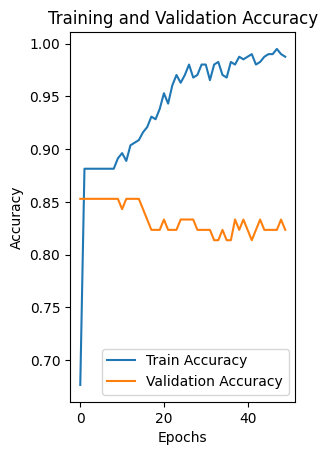

: 

In [ ]:
# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()